In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df= pd.read_excel("cardio_train_with_edc_exposure.xlsx")
df2= pd.read_excel("cardio_train_with_edc_exposure.xlsx")
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,polychlorinated_biphenyls,bisphenol_a,organochlorine_pesticide,phthalate
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0,0,0,0,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1,0,0,0,0
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1,0,0,0,0
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1,0,0,1,0
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0,1,0,0,0


In [3]:
df["age"] = df["age"]/365  #convert age from days to years

# drop id column
df.drop(["id"], axis=1, inplace=True)

# general topic to think about:
cleaning and preporcessing at which level?

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 16 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   age                        70000 non-null  float64
 1   gender                     70000 non-null  int64  
 2   height                     70000 non-null  int64  
 3   weight                     70000 non-null  float64
 4   ap_hi                      70000 non-null  int64  
 5   ap_lo                      70000 non-null  int64  
 6   cholesterol                70000 non-null  int64  
 7   gluc                       70000 non-null  int64  
 8   smoke                      70000 non-null  int64  
 9   alco                       70000 non-null  int64  
 10  active                     70000 non-null  int64  
 11  cardio                     70000 non-null  int64  
 12  polychlorinated_biphenyls  70000 non-null  int64  
 13  bisphenol_a                70000 non-null  int

In [5]:
df.isna().sum()

age                          0
gender                       0
height                       0
weight                       0
ap_hi                        0
ap_lo                        0
cholesterol                  0
gluc                         0
smoke                        0
alco                         0
active                       0
cardio                       0
polychlorinated_biphenyls    0
bisphenol_a                  0
organochlorine_pesticide     0
phthalate                    0
dtype: int64

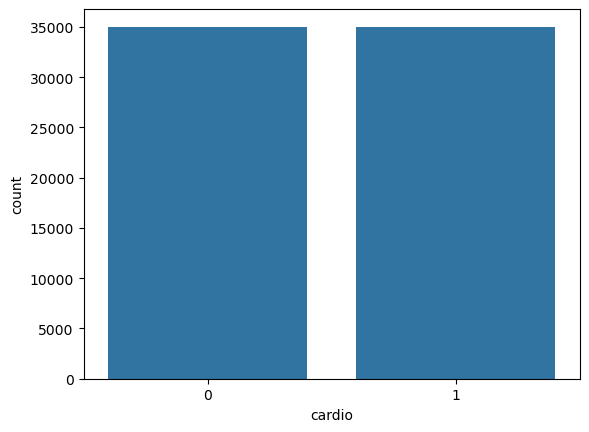

cardio
0    35021
1    34979
Name: count, dtype: int64

In [6]:
sns.countplot(x="cardio", data=df)
plt.show()
df["cardio"].value_counts()

In [7]:
df.shape

(70000, 16)

In [8]:
# only cleaned two features. Age and weight are not cleaned!
def remove_outliers(df, columns_to_clean):
    for column_name in columns_to_clean:
        q1 = df[column_name].quantile(0.25)
        q3 = df[column_name].quantile(0.75)
        iqr = q3 - q1
        lower_bound = q1 - 1.5 * iqr
        upper_bound = q3 + 1.5 * iqr
        # Filter the entire DataFrame based on the outliers for the current column
        df = df[(df[column_name] > lower_bound) & (df[column_name] < upper_bound)]
    
    # Return the cleaned DataFrame after all columns are processed
    return df

columns_to_clean = ["ap_hi", "ap_lo"]
df_cleaned = remove_outliers(df, columns_to_clean)

In [9]:
df.shape

(70000, 16)

In [10]:
# 6290 lines are deleted. --> Strategy for data iumputation? 
# introduce new features only at this stage? --> otherwise values are deleted and the new features are maybe skewed
df_cleaned.shape

(63710, 16)

In [11]:
# cholersterol and gluc features have more than 2 unique values!
df_cleaned= pd.get_dummies(df_cleaned, columns=["cholesterol", "gluc"])
df_cleaned.head()

,age,gender,height,weight,ap_hi,ap_lo,smoke,alco,active,cardio,polychlorinated_biphenyls,bisphenol_a,organochlorine_pesticide,phthalate,cholesterol_1,cholesterol_2,cholesterol_3,gluc_1,gluc_2,gluc_3
0,50.391781,2,168,62.0,110,80,0,0,1,0,0,0,0,0,True,False,False,True,False,False
1,55.419178,1,156,85.0,140,90,0,0,1,1,0,0,0,0,False,False,True,True,False,False
2,51.663014,1,165,64.0,130,70,0,0,0,1,0,0,0,0,False,False,True,True,False,False
3,48.282192,2,169,82.0,150,100,0,0,1,1,0,0,1,0,True,False,False,True,False,False
5,60.038356,1,151,67.0,120,80,0,0,0,0,0,0,0,0,False,True,False,False,True,False


In [12]:
# import train/test split

from sklearn.model_selection import train_test_split
X = df_cleaned.drop(["cardio"], axis = 1)
y = df_cleaned["cardio"]

train_ratio = 0.70
validation_ratio = 0.15
test_ratio = 0.15

#  traditional train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 1 - train_ratio, random_state=42)

# test/validation split
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=test_ratio/(test_ratio + validation_ratio), random_state=42)

In [13]:
# combine x_train and y_train
train_set = pd.merge(X_train, y_train, left_index=True, right_index=True)
train_set.head()

,age,gender,height,weight,ap_hi,ap_lo,smoke,alco,active,polychlorinated_biphenyls,bisphenol_a,organochlorine_pesticide,phthalate,cholesterol_1,cholesterol_2,cholesterol_3,gluc_1,gluc_2,gluc_3,cardio
41344,40.158904,1,165,65.0,120,80,0,0,0,0,1,0,0,True,False,False,True,False,False,0
21164,43.512329,1,154,87.0,120,80,0,0,1,0,0,0,0,True,False,False,True,False,False,0
14652,56.156164,1,156,59.0,110,70,0,0,1,0,0,1,0,True,False,False,True,False,False,1
36435,53.410959,2,160,60.0,120,80,0,0,1,1,1,0,0,True,False,False,True,False,False,0
5545,57.969863,2,170,80.0,130,90,0,0,1,0,0,0,0,True,False,False,True,False,False,0


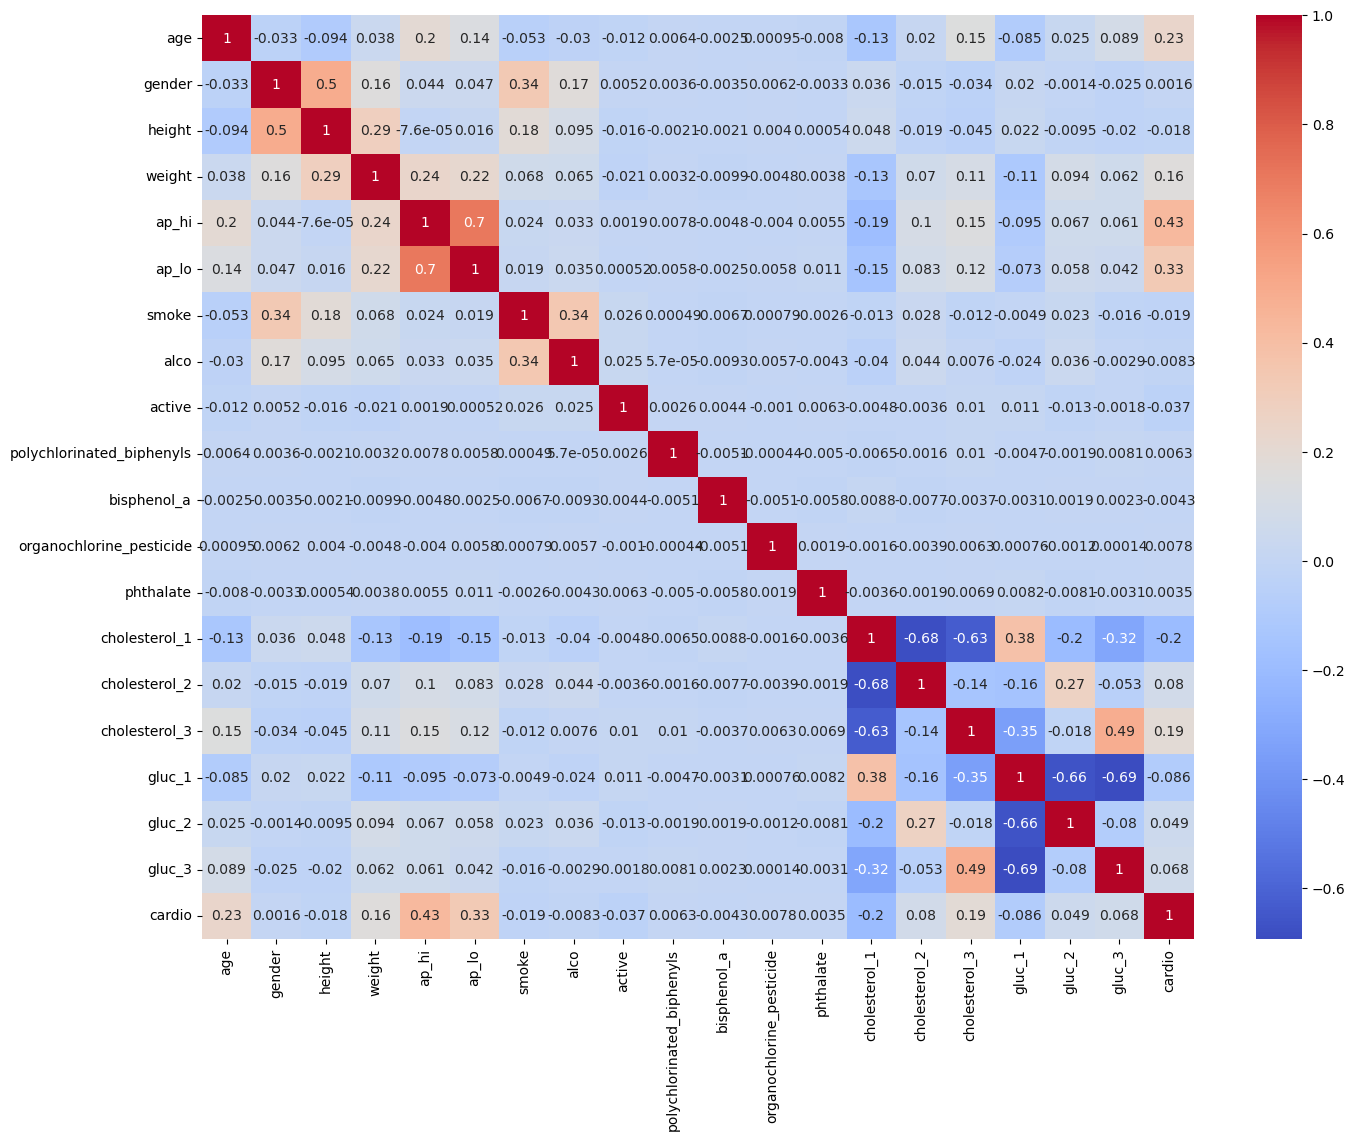

In [14]:
# correlation with the target variable
correlation = train_set.corr()
plt.figure(figsize=(16,12))
sns.heatmap(correlation, cmap= "coolwarm", annot= True)
plt.show()

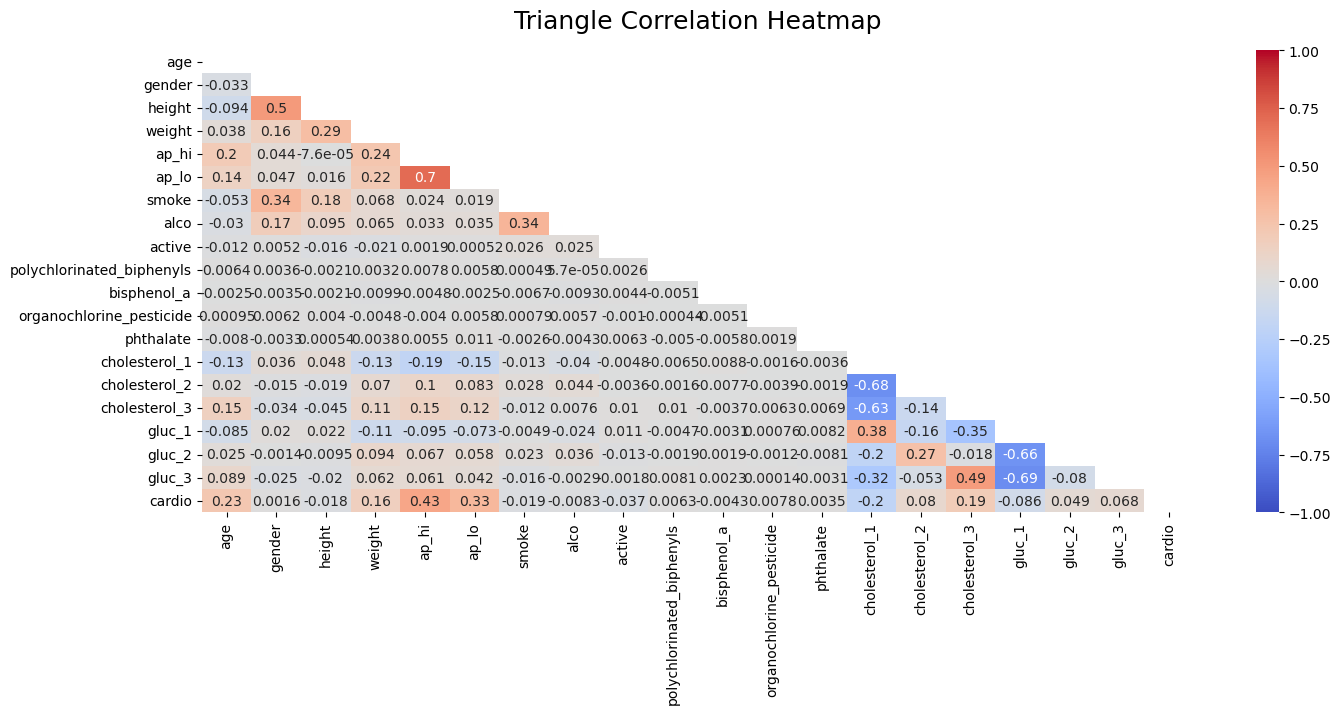

In [55]:
import matplotlib.pyplot as plt
plt.figure(figsize=(16,6))
mask = np.triu(np.ones_like(train_set.corr(), dtype= bool))

heatmap = sns.heatmap(train_set.corr(), mask= mask, vmin= -1, vmax= 1, annot= True, cmap= "coolwarm")
heatmap.set_title("Triangle Correlation Heatmap", fontdict= {"fontsize": 18}, pad= 16)
plt.show()

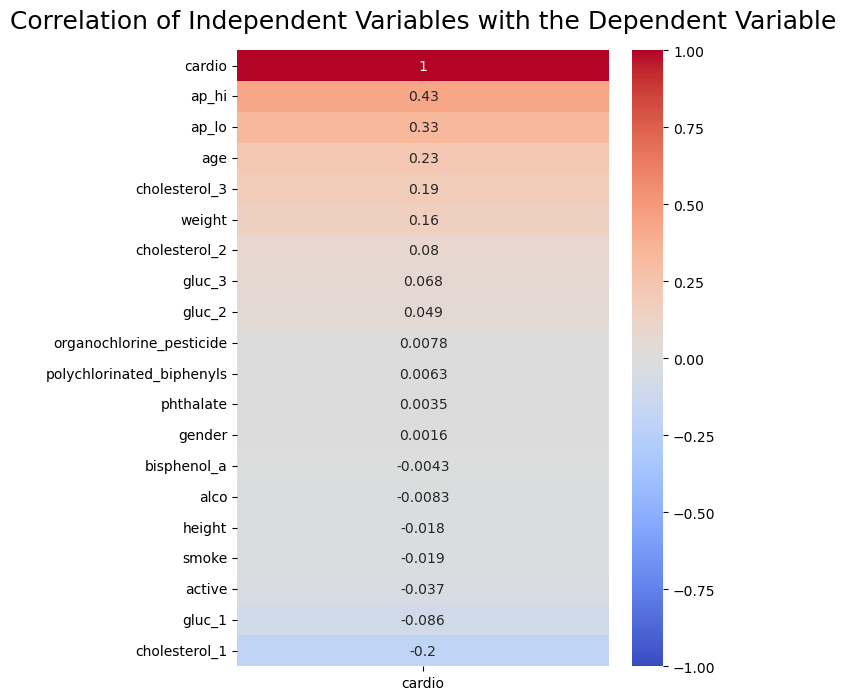

In [15]:
# correlation of indepenedent variables with the dependent variable
plt.figure(figsize=(6,8))
heatmap = sns.heatmap(train_set.corr()[["cardio"]].sort_values(by= "cardio", ascending= False), vmin= -1, vmax= 1, annot= True, cmap= "coolwarm")
heatmap.set_title("Correlation of Independent Variables with the Dependent Variable", fontdict= {"fontsize": 18}, pad= 16)
plt.show()

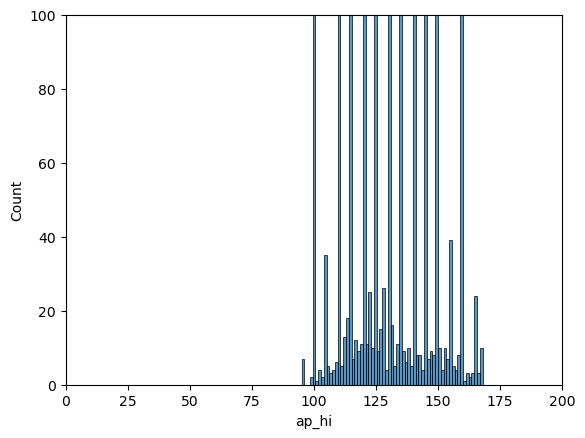

In [16]:
sns.histplot(data= train_set, x= "ap_hi")
plt.ylim(0,100)
plt.xlim(0,200)
plt.show()

In [17]:
train_set.describe()

,age,gender,height,weight,ap_hi,ap_lo,smoke,alco,active,polychlorinated_biphenyls,bisphenol_a,organochlorine_pesticide,phthalate,cardio
count,44596.000000,44596.000000,44596.000000,44596.000000,44596.000000,44596.000000,44596.000000,44596.000000,44596.000000,44596.000000,44596.000000,44596.000000,44596.000000,44596.000000
mean,53.391432,1.352072,164.489999,74.195518,126.318302,81.716118,0.087833,0.052942,0.802807,0.108777,0.105727,0.101601,0.104180,0.494932
std,6.730232,0.477622,8.137754,14.088103,13.705864,7.581857,0.283055,0.223920,0.397883,0.311362,0.307491,0.302126,0.305497,0.499980
min,29.750685,1.000000,59.000000,11.000000,95.000000,66.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.506164,1.000000,159.000000,65.000000,120.000000,80.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,54.000000,1.000000,165.000000,72.000000,120.000000,80.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,58.454795,2.000000,170.000000,82.000000,140.000000,90.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,64.909589,2.000000,250.000000,200.000000,168.000000,104.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [18]:
train_set.shape

(44596, 20)

In [19]:
df_cleaned.describe()

,age,gender,height,weight,ap_hi,ap_lo,smoke,alco,active,cardio,polychlorinated_biphenyls,bisphenol_a,organochlorine_pesticide,phthalate
count,63710.000000,63710.000000,63710.000000,63710.000000,63710.000000,63710.000000,63710.000000,63710.000000,63710.000000,63710.000000,63710.000000,63710.000000,63710.000000,63710.000000
mean,53.392099,1.352143,164.470899,74.215650,126.359724,81.733574,0.087679,0.052849,0.803532,0.496139,0.108162,0.104960,0.102040,0.103186
std,6.733685,0.477642,8.144930,14.079373,13.758444,7.600795,0.282829,0.223733,0.397330,0.499989,0.310587,0.306504,0.302704,0.304204
min,29.750685,1.000000,55.000000,11.000000,95.000000,66.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.528767,1.000000,159.000000,65.000000,120.000000,80.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,54.010959,1.000000,165.000000,72.000000,120.000000,80.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,58.459589,2.000000,170.000000,82.000000,140.000000,90.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,64.967123,2.000000,250.000000,200.000000,169.000000,104.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


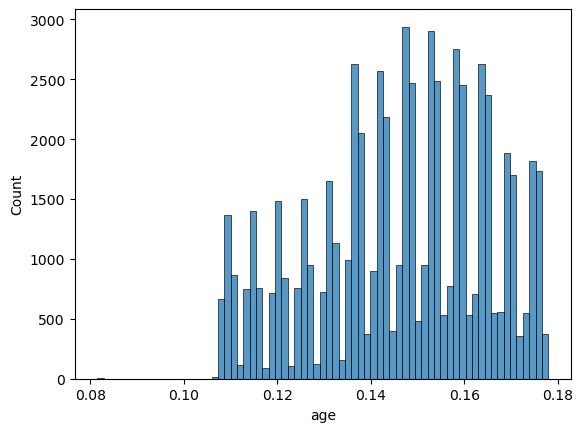

In [61]:
# age feature

sns.histplot((df_cleaned["age"]))
plt.show()

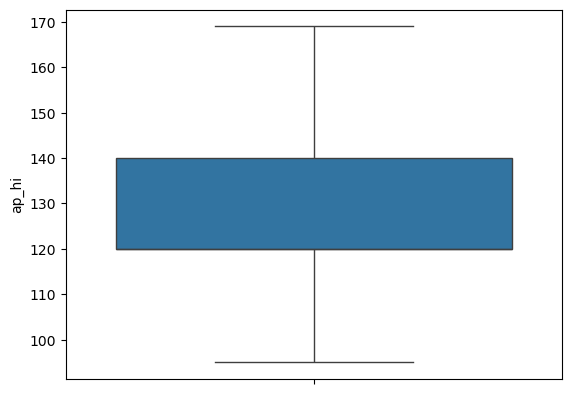

In [62]:
sns.boxplot(df_cleaned["ap_hi"])
plt.show()

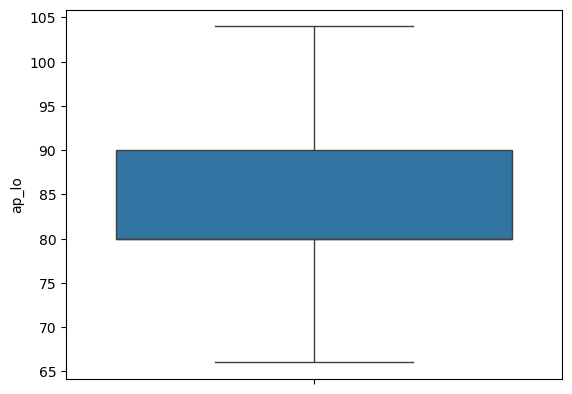

In [63]:
sns.boxplot(df_cleaned["ap_lo"])
plt.show()

In [431]:
# resplit the df_cleaned in x_train and y_train

#X_test = df_cleaned.drop(["cardio"], axis = 1)
#y_test = df_cleaned["cardio"]



# Machine Learning Models

In [22]:
# import all necessary models

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_recall_curve


In [23]:
# model 1
m1 = "Logistic Regression"
lr = LogisticRegression()
lr.fit(X_train, y_train)
lr_predict = lr.predict(X_test)
lr_conf_matrix = confusion_matrix(y_test, lr_predict)
lr_acc_score = accuracy_score(y_test, lr_predict)
print("confussion matrix")
print(lr_conf_matrix)
print("\n")
print("Accuracy of Logistic Regression model:",lr_acc_score*100, "\n")
print(classification_report(y_test, lr_predict))

confussion matrix
[[3624 1101]
 [1612 3220]]


Accuracy of Logistic Regression model: 71.61243067908339 

              precision    recall  f1-score   support

           0       0.69      0.77      0.73      4725
           1       0.75      0.67      0.70      4832

    accuracy                           0.72      9557
   macro avg       0.72      0.72      0.72      9557
weighted avg       0.72      0.72      0.72      9557



/Users/ramonwinkler/anaconda3/envs/Data Science/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [24]:
# model 2
m2 = "Naive Bayes"
nb = GaussianNB()
nb.fit(X_train, y_train)
nb_pred = nb.predict(X_test)
nb_conf_matrix = confusion_matrix(y_test, nb_pred)
nb_acc_score = accuracy_score(y_test, nb_pred)
print("confussion matrix")
print(nb_conf_matrix)
print("\n")
print("Accuracy of Naive Bayes model:", nb_acc_score*100, "\n")
print(classification_report(y_test, nb_pred))

confussion matrix
[[3650 1075]
 [1963 2869]]


Accuracy of Naive Bayes model: 68.21178193993931 

              precision    recall  f1-score   support

           0       0.65      0.77      0.71      4725
           1       0.73      0.59      0.65      4832

    accuracy                           0.68      9557
   macro avg       0.69      0.68      0.68      9557
weighted avg       0.69      0.68      0.68      9557



In [25]:
# model 3
m3 = "Random Forest Classifier"
rf = RandomForestClassifier(n_estimators=20, random_state=12, max_depth=5)
rf.fit(X_train,y_train)
rf_predicted = rf.predict(X_test)
rf_conf_matrix = confusion_matrix(y_test, rf_predicted)
rf_acc_score = accuracy_score(y_test, rf_predicted)
print("confussion matrix")
print(rf_conf_matrix)
print("\n")
print("Accuracy of Random Forest model:", rf_acc_score*100, "\n")
print(classification_report(y_test, rf_predicted))

confussion matrix
[[3733  992]
 [1665 3167]]


Accuracy of Random Forest model: 72.19838861567438 

              precision    recall  f1-score   support

           0       0.69      0.79      0.74      4725
           1       0.76      0.66      0.70      4832

    accuracy                           0.72      9557
   macro avg       0.73      0.72      0.72      9557
weighted avg       0.73      0.72      0.72      9557



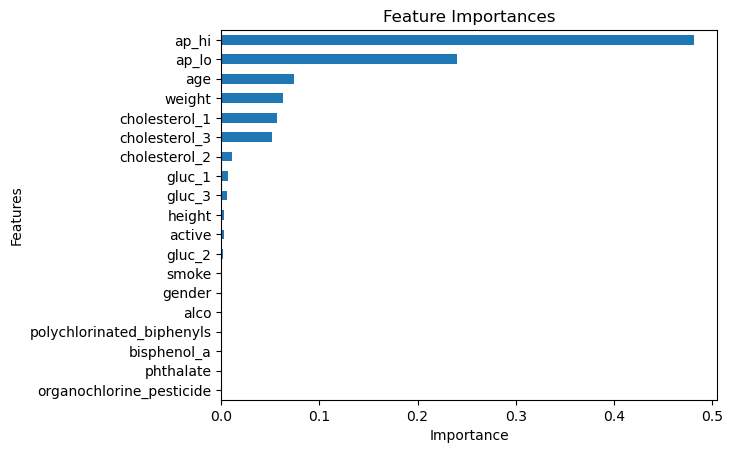

Feature importances and model saved successfully.


In [30]:
# Calculate and plot feature importance
feature_importances = pd.Series(rf.feature_importances_, index=X_train.columns)
feature_importances.sort_values().plot(kind='barh')  # Using sort_values() for correct sorting
plt.title("Feature Importances")
plt.xlabel("Importance")
plt.ylabel("Features")
plt.show()

# Save feature importances to CSV
feature_importances.to_csv("feature_importances.csv")

# Save the trained CVD risk model as a .pkl file
import joblib
cvd_risk_model = rf  # rf is your trained random forest model
joblib.dump(cvd_risk_model, "cvd_risk_model.pkl")

print("Feature importances and model saved successfully.")


In [69]:
m4 = 'Extreme Gradient Boost'
xgb = XGBClassifier(learning_rate=0.01, n_estimators=25, max_depth=15,gamma=0.6, subsample=0.52,colsample_bytree=0.6,seed=27,
                    reg_lambda=2, booster='dart', colsample_bylevel=0.6, colsample_bynode=0.5)
xgb.fit(X_train, y_train)
xgb_predicted = xgb.predict(X_test)
xgb_conf_matrix = confusion_matrix(y_test, xgb_predicted)
xgb_acc_score = accuracy_score(y_test, xgb_predicted)
print("confussion matrix")
print(xgb_conf_matrix)
print("\n")
print("Accuracy of Extreme Gradient Boost:",xgb_acc_score*100,'\n')
print(classification_report(y_test,xgb_predicted))

confussion matrix
[[3811  914]
 [1697 3135]]


Accuracy of Extreme Gradient Boost: 72.67971120644555 

              precision    recall  f1-score   support

           0       0.69      0.81      0.74      4725
           1       0.77      0.65      0.71      4832

    accuracy                           0.73      9557
   macro avg       0.73      0.73      0.73      9557
weighted avg       0.73      0.73      0.73      9557



In [70]:
m5 = 'K-NeighborsClassifier'
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train, y_train)
knn_predicted = knn.predict(X_test)
knn_conf_matrix = confusion_matrix(y_test, knn_predicted)
knn_acc_score = accuracy_score(y_test, knn_predicted)
print("confussion matrix")
print(knn_conf_matrix)
print("\n")
print("Accuracy of K-NeighborsClassifier:",knn_acc_score*100,'\n')
print(classification_report(y_test,knn_predicted))

confussion matrix
[[3806  919]
 [1925 2907]]


Accuracy of K-NeighborsClassifier: 70.24170764884377 

              precision    recall  f1-score   support

           0       0.66      0.81      0.73      4725
           1       0.76      0.60      0.67      4832

    accuracy                           0.70      9557
   macro avg       0.71      0.70      0.70      9557
weighted avg       0.71      0.70      0.70      9557



In [71]:
m6 = 'DecisionTreeClassifier'
dt = DecisionTreeClassifier(criterion = 'entropy',random_state=0,max_depth = 6)
dt.fit(X_train, y_train)
dt_predicted = dt.predict(X_test)
dt_conf_matrix = confusion_matrix(y_test, dt_predicted)
dt_acc_score = accuracy_score(y_test, dt_predicted)
print("confussion matrix")
print(dt_conf_matrix)
print("\n")
print("Accuracy of DecisionTreeClassifier:",dt_acc_score*100,'\n')
print(classification_report(y_test,dt_predicted))

confussion matrix
[[3815  910]
 [1721 3111]]


Accuracy of DecisionTreeClassifier: 72.4704405148059 

              precision    recall  f1-score   support

           0       0.69      0.81      0.74      4725
           1       0.77      0.64      0.70      4832

    accuracy                           0.72      9557
   macro avg       0.73      0.73      0.72      9557
weighted avg       0.73      0.72      0.72      9557



In [72]:
m7 = 'Support Vector Classifier'
svc =  SVC(kernel='rbf', C=2)
svc.fit(X_train, y_train)
svc_predicted = svc.predict(X_test)
svc_conf_matrix = confusion_matrix(y_test, svc_predicted)
svc_acc_score = accuracy_score(y_test, svc_predicted)
print("confussion matrix")
print(svc_conf_matrix)
print("\n")
print("Accuracy of Support Vector Classifier:",svc_acc_score*100,'\n')
print(classification_report(y_test,svc_predicted))

confussion matrix
[[4051  674]
 [2148 2684]]


Accuracy of Support Vector Classifier: 70.47190540964738 

              precision    recall  f1-score   support

           0       0.65      0.86      0.74      4725
           1       0.80      0.56      0.66      4832

    accuracy                           0.70      9557
   macro avg       0.73      0.71      0.70      9557
weighted avg       0.73      0.70      0.70      9557



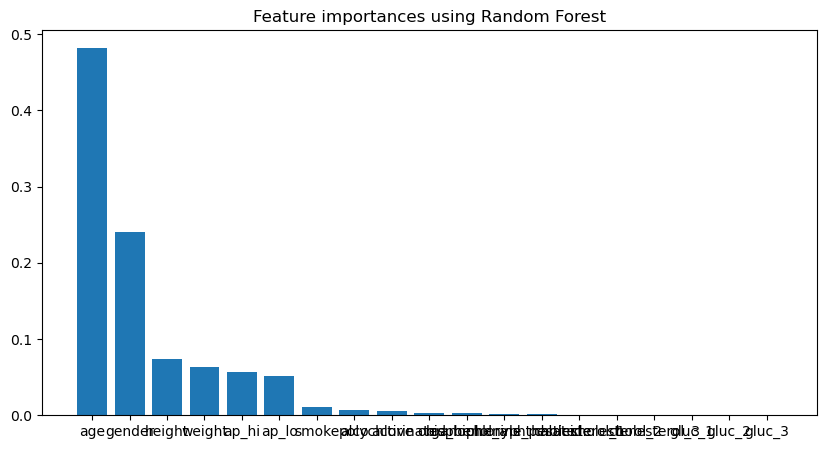

In [73]:
# feature importance --> to be optimized this based on random forest
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]
features = X_train.columns

plt.figure(figsize=(10,5))
plt.title("Feature importances using Random Forest")
plt.bar(range(X_train.shape[1]), importances[indices])
plt.xticks(range(X_train.shape[1]), features)
plt.show()

In [441]:
#colors = ['red','green','blue','gold','silver','yellow','orange',]
#plt.figure(figsize=(12,5))
#plt.title("barplot Represent Accuracy of different models")#
#plt.xlabel("Accuracy %")
#plt.ylabel("Algorithms")
#plt.bar(model_ev['Model'],model_ev['Accuracy'],color = colors)
#plt.show()

In [442]:
# stacking classifiers over each other
scv=StackingCVClassifier(classifiers=[xgb,knn,svc],meta_classifier= svc,random_state=42)
scv.fit(X_train,y_train)
scv_predicted = scv.predict(X_test)
scv_conf_matrix = confusion_matrix(y_test, scv_predicted)
scv_acc_score = accuracy_score(y_test, scv_predicted)
print("confussion matrix")
print(scv_conf_matrix)
print("\n")
print("Accuracy of StackingCVClassifier:",scv_acc_score*100,'\n')
print(classification_report(y_test,scv_predicted))

NameError: name 'StackingCVClassifier' is not defined

# Use tpot auto ml on the original dataframe and compare the model

In [74]:
pip install tpot

Note: you may need to restart the kernel to use updated packages.


In [444]:
# use tpot on the original dataset, as it also considers multiple preprocessing steps
X = df.drop(["cardio"], axis = 1)
y = df["cardio"]

train_ratio = 0.70
validation_ratio = 0.15
test_ratio = 0.15

#  traditional train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 1 - train_ratio, random_state=42)

# test/validation split
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=test_ratio/(test_ratio + validation_ratio), random_state=42)


from tpot import TPOTClassifier
pipeline_optimizer = TPOTClassifier(generations=5, population_size=20, cv=5,
                                    random_state=42, verbosity=2)
pipeline_optimizer.fit(X_train, y_train)
print(pipeline_optimizer.score(X_test, y_test))

/Users/ramonwinkler/anaconda3/envs/Data Science/lib/python3.12/site-packages/tpot/builtins/__init__.py:36: UserWarning: Warning: optional dependency `torch` is not available. - skipping import of NN models.
  warnings.warn("Warning: optional dependency `torch` is not available. - skipping import of NN models.")


Optimization Progress:   0%|          | 0/120 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: 0.7338721131477389

Generation 2 - Current best internal CV score: 0.7338721131477389

Generation 3 - Current best internal CV score: 0.733872167297371

Generation 4 - Current best internal CV score: 0.7339945704580434

Generation 5 - Current best internal CV score: 0.7346069028284852

Best pipeline: XGBClassifier(ZeroCount(input_matrix), learning_rate=0.01, max_depth=8, min_child_weight=15, n_estimators=100, n_jobs=1, subsample=0.25, verbosity=0)
0.7426911722693077


In [75]:
# tpot with cleaned df:
from tpot import TPOTClassifier
pipeline_optimizer = TPOTClassifier(generations=5, population_size=20, cv=5,
                                    random_state=42, verbosity=2)
pipeline_optimizer.fit(X_train, y_train)
print(pipeline_optimizer.score(X_test, y_test))

/Users/ramonwinkler/anaconda3/envs/Data Science/lib/python3.12/site-packages/tpot/builtins/__init__.py:36: UserWarning: Warning: optional dependency `torch` is not available. - skipping import of NN models.
  warnings.warn("Warning: optional dependency `torch` is not available. - skipping import of NN models.")


Optimization Progress:   0%|          | 0/120 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: 0.7289890680298069

Generation 2 - Current best internal CV score: 0.7292581665482617

Generation 3 - Current best internal CV score: 0.7292581665482617

Generation 4 - Current best internal CV score: 0.7292581665482617

Generation 5 - Current best internal CV score: 0.7297290336496329

Best pipeline: GradientBoostingClassifier(MaxAbsScaler(input_matrix), learning_rate=0.1, max_depth=3, max_features=0.35000000000000003, min_samples_leaf=17, min_samples_split=16, n_estimators=100, subsample=0.45)
0.730459349168149


In [ ]:
# model 3 optimization
# max_range = []
# n_estimators= [5,10,20,50,100]


# m3 = "Random Forest Classifier"
#rf = RandomForestClassifier(n_estimators=20, random_state=12, max_depth=5)
#rf.fit(X_train,y_train)
#rf_predicted = rf.predict(X_test)
#rf_conf_matrix = confusion_matrix(y_test, rf_predicted)
#rf_acc_score = accuracy_score(y_test, rf_predicted)
#print("confussion matrix")
#print(rf_conf_matrix)
#print("\n")
#print("Accuracy of Random Forest model:", rf_acc_score*100, "\n")
#print(classification_report(y_test, rf_predicted))

# safe the model and feature importance

In [ ]:
cvd_risk_model = rf
# save the model as pkl

import joblib
joblib.dump(cvd_risk_model, "cvd_risk_model.pkl")


# save the nodel importances



In [ ]:
# emr bots! artificial generated electronics medical records
# cdss in r or ython, 

# exercise folder moodle

# 100 patients folder